### LEARNING OBJECTIVES:
1. Understand how to use the objects created using cobrapy.
  - Reactions, metabolites and genes.
2. Perform simulations and comprehend the solution provided.
3. Add flux constraints.
 - How to use models for investigating biological systems.



## Install these packages to perform the simulations

We will use a few number of packages to work with models and simulation data.

1. cobrapy: <br>
Ebrahim, A., Lerman, J. A., Palsson, B. O., & Hyduke, D. R. (2013). COBRApy: constraints-based reconstruction and analysis for python. BMC systems biology, 7(1), 1-6.

2. cameo: <br>
Cardoso, J. G., Jensen, K., Lieven, C., Lærke Hansen, A. S., Galkina, S., Beber, M., ... & Sonnenschein, N. (2018). Cameo: a Python library for computer aided metabolic engineering and optimization of cell factories. ACS synthetic biology, 7(4), 1163-1166.


In [1]:
!pip install depinfo==1.7.0 # this is required by both cobrapy and cameo
!pip install cobra==0.17.0
!pip install cameo
# this automatically install cobrapy

print("Done! 🎉 ")

Done! 🎉 


##### Importing required packages

In [2]:
import cobra
from cameo import models

#for plotting
import matplotlib
from matplotlib import pyplot as plt

#for working with dataframes
import pandas as pd
import numpy as np

#for string pattern matching
import re

#### Loading the *E. coli* model using cameo.models

In [3]:
eco_model = models.bigg.iML1515 #Latest Escherichia coli K-12 MG1655
# Question: what does 1515 prefix in the model id mean?

### Working with cobrapy objects

In [4]:
#summary of the model object
eco_model

Name,iML1515
Memory address,0x017f67e3e0
Number of metabolites,1877
Number of reactions,2712
Number of groups,0
Objective expression,1.0*BIOMASS_Ec_iML1515_core_75p37M - 1.0*BIOMASS_Ec_iML1515_core_75p37M_reverse_35685
Compartments,"cytosol, extracellular space, periplasm"


#### How many reactions, metabolites, and genes are present in the model

In [5]:
print('reactions: %s; metabolites: %s; genes: %s'%(len(eco_model.reactions), len(eco_model.metabolites), len(eco_model.genes)))

# Why are there 1516 genes? We will answer this later.

reactions: 2712; metabolites: 1877; genes: 1516


#### How to work with model components such as reactions, metabolites, genes?

In [6]:
# creating a reaction object
rxn_akgdh = eco_model.reactions.get_by_id('AKGDH')
# print the identifier, name, and reaction string for the reaction
print(f'{rxn_akgdh.id}\t{rxn_akgdh.name}\t{rxn_akgdh.reaction}')

AKGDH	2-Oxogluterate dehydrogenase	akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c


#### Stoichiometry of all the metabolites in a reaction

In [7]:
# metabolite within a reaction contains metabolite id and respective stoichiometry
for met, stoich in rxn_akgdh.metabolites.items():
    print(met, stoich)

akg_c -1.0
co2_c 1.0
coa_c -1.0
nad_c -1.0
nadh_c 1.0
succoa_c 1.0


#### Stoichiometry of a certain metabolite

In [8]:
# Assign a metabolite object from the reaction AKGDH
akg_stoich = rxn_akgdh.get_coefficient('akg_c')
print(f'stoichiometry of akg_c is {akg_stoich}')

stoichiometry of akg_c is -1.0


#### Find the objective reaction

In [9]:
# iterate through the reactions and identify whether objective_coefficient is equal to 1.
for reactions in eco_model.reactions:
    if reactions.objective_coefficient == 1:
        print(f'The objective function is: {reactions.id}')

The objective function is: BIOMASS_Ec_iML1515_core_75p37M


#### Question: Check whether AKGDH is an objective reaction

<!-- print(rxn_akgdh.objective_coefficient == 1) -->


In [10]:
# Check whether AKGDH is an objective reaction


#### Checking the GPR (gene-protein-reaction association) for the reaction

In [11]:
akgdh_gpr = rxn_akgdh.gene_reaction_rule
print(f'GPR for AKGDH is {akgdh_gpr}')

GPR for AKGDH is b0727 and b0116 and b0726


#### Checking the bounds of this reaction

In [12]:
print(f'both bounds: {rxn_akgdh.bounds}, lower bound only: {rxn_akgdh.lower_bound}, upper bound only: {rxn_akgdh.upper_bound}') #in mmol/(gdW.hr)

# summary method can also be used to determine the bounds
print(rxn_akgdh.summary())
#flux is in unit mmol/(gDW.hr)

both bounds: (0.0, 1000.0), lower bound only: 0.0, upper bound only: 1000.0
GENES METABOLITES  METABOLITES  METABOLITES
  ID       ID     STOICHIOMETRY COMPARTMENT
b0727      akg_c       -1.0          c     
b0726      co2_c        1.0          c     
b0116      coa_c       -1.0          c     
           nad_c       -1.0          c     
          nadh_c        1.0          c     
        succoa_c        1.0          c     


cobra/core/summary/summary.py:206 UserWarning: Setting float_format to anything other than None will cause nan to be present in the output.
cobra/core/summary/reaction_summary.py:82 FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.


#### Similar to reactions, metabolites can also be queried

In [13]:
# assign the metabolite to a variable
akg = eco_model.metabolites.get_by_id('akg_c')

# some properties of the metabolite
print(f'name: {akg.name}, formula: {akg.formula}, charge: {akg.charge}, compartment: {akg.compartment}')

name: 2-Oxoglutarate, formula: C5H4O5, charge: -2, compartment: c


#### What are all the associated reactions for this compound?

In [14]:
for reactions in akg.reactions:
    print(f'{reactions.id}\t{reactions.reaction}')

ACOTA	acorn_c + akg_c <=> acg5sa_c + glu__L_c
LEUTAi	4mop_c + glu__L_c --> akg_c + leu__L_c
ALATA_L	akg_c + ala__L_c <=> glu__L_c + pyr_c
PSERT	3php_c + glu__L_c --> akg_c + pser__L_c
AKGt2rpp	akg_p + h_p <=> akg_c + h_c
ASPTA	akg_c + asp__L_c <=> glu__L_c + oaa_c
ICDHyr	icit_c + nadp_c <=> akg_c + co2_c + nadph_c
HSTPT	glu__L_c + imacp_c --> akg_c + hisp_c
PHETA1	akg_c + phe__L_c <=> glu__L_c + phpyr_c
PTRCTA	akg_c + ptrc_c --> 4abutn_c + glu__L_c
AHGDx	S2hglut_c + nad_c <=> akg_c + h_c + nadh_c
OHPBAT	glu__L_c + ohpb_c <=> akg_c + phthr_c
SHGO	S2hglut_c + o2_c --> akg_c + h2o2_c
TDPAGTA	dtdp4d6dg_c + glu__L_c --> akg_c + dtdp4addg_c
ILETA	akg_c + ile__L_c <=> 3mop_c + glu__L_c
CYSTA	akg_c + cys__L_c --> glu__L_c + mercppyr_c
ABTA	4abut_c + akg_c --> glu__L_c + sucsal_c
GLUDy	glu__L_c + h2o_c + nadp_c <=> akg_c + h_c + nadph_c + nh4_c
UDPKAAT	glu__L_c + udpLa4o_c <=> akg_c + udpLa4n_c
SOTA	akg_c + sucorn_c --> glu__L_c + sucgsa_c
TYRTA	akg_c + tyr__L_c <=> 34hpp_c + glu__L_c
SDPTA	akg

#### What if I do not know the exact metabolite?

In [15]:
#creates a list of metabolite objects
some_metabolite = eco_model.metabolites.query('ak')

#now go through the list and query the objects
for mets in some_metabolite:
    print(f'{mets.id}, {mets.name}')

akg_e, 2-Oxoglutarate
akg_c, 2-Oxoglutarate
akg_p, 2-Oxoglutarate


#### How do we find the reactions associated with the gene b0727?

In [16]:
#assign the gene object to a variable
gene_query = eco_model.genes.get_by_id('b0727')

#now go through the reactions associated with this gene
for reactions in gene_query.reactions:
    print(reactions.id, reactions.name, reactions.reaction)

AKGDH 2-Oxogluterate dehydrogenase akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c


#### Why are there 1516 genes instead of 1515?

In [17]:
# In more recent reconstructions, spontaneous reactions have been associated with an artificial gene (s0001) and protein (S0001).

# Get the list of genes that are not associated with any annotation. 
# In E. coli, genes have identifiers/locus tags: b\d\d\d\d\d.
# For instance b0727

not_gene = [g.id for g in eco_model.genes if re.findall(r'b\d{4}', g.id) == []]

print(f'The artificial genes are: {not_gene}')

The artificial genes are: ['s0001']


#### Question: What are the reactions associated with this gene

CODE HERE:

<!-- for reactions in eco_model.genes.get_by_id(s_gene).reactions:
    print(reactions.id, reactions.name, reactions.reaction) -->

In [18]:
#since it is only one gene, we can assign it (the gene id) to a variable s_gene
s_gene = not_gene[0]

#now we can iterate through all the reactions associated with this gene s_gene


### Simulating a model

In [19]:
# solve the model with default constraints applied and assign the solution to a variable
solution = eco_model.optimize()

#### How to check for the solution

In [20]:
# we can convert solution to a dataframe
solution_df = solution.to_frame()

# now let's find the fluxes that are non-zero
solution_df = solution_df[solution_df['fluxes'] != 0]
solution_df


,fluxes,reduced_costs
SHK3Dr,0.334240,-7.187117e-17
DHORTS,-0.290106,2.816018e-18
OMPDC,0.290106,-2.656295e-17
G5SD,0.193865,4.553649e-18
CS,6.913003,2.656295e-17
...,...,...
TYRL,0.000196,-8.445935e-17
THZPSN3,0.000196,8.326673e-17
PAI2T,0.000393,-7.632783e-17
4HTHRK,0.000587,2.656295e-17


#### Use the *summary* method to investigate uptakes, secretions and objective value

In [21]:
eco_model.summary()

#### Find the objective value (i.e. biomass production)

In [22]:
# since the objective reaction is biomass reaction, the flux through the biomass reaction is given here
print(f'Objective value is {solution.objective_value}/hr')

Objective value is 0.8769972144269896/hr


#### How to find the flux through a specific reaction?

1.   List item
2.   List item



In [23]:
rxn_akgdh = eco_model.reactions.AKGDH

akgdh_optimal = solution['AKGDH']
print(f'The flux through AKGDH at optimial growth rate is {akgdh_optimal} mmol/(gDW.hr)')

The flux through AKGDH at optimial growth rate is 5.970062721906816 mmol/(gDW.hr)


#### Summary method to check the flux through a reaction

In [24]:
## using the shortcut here to get the reaction instead of .get_by_id method
eco_model.reactions.AKGDH.summary()

cobra/core/summary/reaction_summary.py:82 FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.


#### Can we do something similar for metabolite objects?

In [25]:
eco_model.metabolites.akg_c.summary()

#### Sometimes model cannot be solved depending on the constraint applied

In [26]:
eco_model.reactions.EX_etoh_e.lower_bound = 100.

eco_model.optimize()

cobra/util/solver.py:416 UserWarning: solver status is 'infeasible'


<Solution infeasible at 0x2851e2fb0>

### Gene and Reaction Essentiality

#### Gene Essentiality

In [27]:
#reset to zero for future simulations
eco_model.reactions.EX_etoh_e.lower_bound = 0.

agene = eco_model.genes.b0727
with eco_model: #does not change the model
    solution = eco_model.optimize()
    print(f'Before KO: {solution.objective_value}')
    agene.knock_out()
    solution = eco_model.optimize()
    print(f'After KO: {solution.objective_value}')


Before KO: 0.8769972144269733
After KO: 0.8633703561644827


#### Reaction Essentiality

In [28]:
rxn_akgdh = eco_model.reactions.AKGDH
with eco_model: #does not change the model
    solution = eco_model.optimize()
    print(f'Before KO: {solution.objective_value}')
    rxn_akgdh.knock_out()
    solution = eco_model.optimize()
    print(f'After KO: {solution.objective_value}')

Before KO: 0.8769972144269668
After KO: 0.8633703561644809


### Constraining the reactions to investigate their effects

In [29]:
### aerobic to anaerobic growth simulation

o2_ex = eco_model.reactions.EX_o2_e
etoh_ex = eco_model.reactions.EX_etoh_e
o2_gr_etoh_list = []

# we will constrain the uptake fluxes of the oxygen uptake reaction (EX_o2_e) over a range 0-20 mmol/(gDW.hr)
for lb in np.linspace(0., 20., 100):
    o2_ex.bounds = -lb, 1000. # we will constrain the reaction here by fixing the lower bound
    solution = eco_model.optimize()

    #assignign biomass production rate and ethanol flux
    growth_rate = solution.objective_value
    etoh_flux = solution['EX_etoh_e']

    #now we append a dictionary to the list with keys EX_o2_e, Growth and Ethanol
    o2_gr_etoh_list.append({'EX_o2_e': lb, 'Growth': growth_rate, 'Ethanol': etoh_flux})

o2_gr_etoh_df = pd.DataFrame(o2_gr_etoh_list)


Text(0.5, 0, 'Oxygen uptake flux')

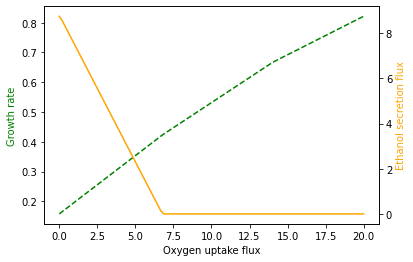

In [30]:
## plot it on a graph
fig, ax = plt.subplots() #we need to axes, hence subplots is being used here

ax1 = ax.twinx() #Create a twin Axes sharing the x-axis.

# now plot using the pandas dataframe method plot
o2_gr_etoh_df.plot(ax=ax, x='EX_o2_e', y='Growth', style='--', color='green')
o2_gr_etoh_df.plot(ax=ax1, x='EX_o2_e', y='Ethanol', style='-', color='orange')

#remove the legends (distracting)
ax.get_legend().remove()
ax1.get_legend().remove()

#set the x and the y label
ax.set_ylabel('Growth rate', color='green')
ax1.set_ylabel('Ethanol secretion flux', color='orange')
ax.set_xlabel('Oxygen uptake flux')


#### Question: How can we interpret this result?

### Take home assignment

- Acetate overflow due to constraints on AKGDH reaction.
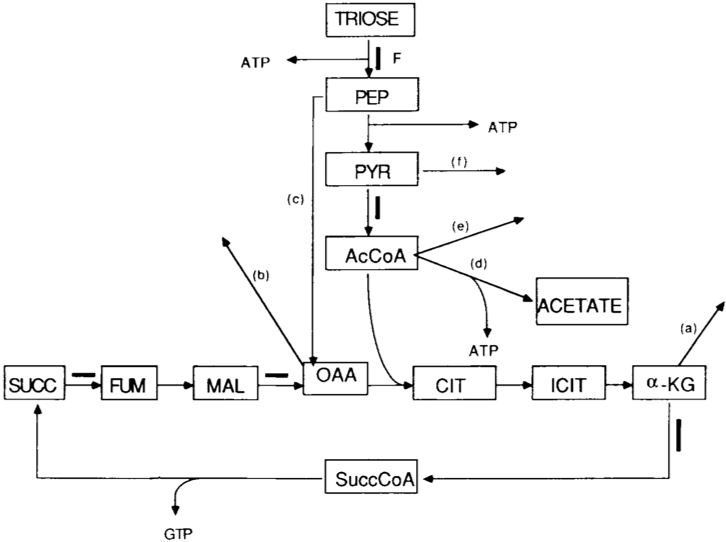

    - Studies such as [Majewski et al., 1990] have indicated that due to constraint on the reaction catalyzed by alphaketoglutarate dehydrogenase protein, bacteria can start producing acetate. This causes lower flux through the TCA cycle, and flux being divereted towards acetate production.
    - How can we use genome-scale model to study this phenomenon?
    - Hint #1: Reaction catalyzed by the protein is AKGDH in iML1515 model.
    - Hint #2: Constraint can be added by fixing the flux bounds (upper flux bound) of the reaction.